# Lab 6 Data Science
## Analítica de redes sociales.
---
1. Jorge Perez - 18364
2. Diego Ruiz - 18761

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch
import re
import skfuzzy as fuzz
from collections import Counter
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud

In [353]:
trafico_df = pd.read_csv('Datos Redes/traficogt.csv')
bernardo_df = pd.read_csv('Datos Redes/bernardoArevalo.csv')
sandra_df = pd.read_csv('Datos Redes/sandraTorres.csv')


## Datos

Tráfico en Guatemala

In [354]:
trafico_df.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1701654244858679742,1701654244858679742,https://twitter.com/EmisorasUnidas/status/1701...,2023-09-12 17:49:21+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,"#AHORA Amílcar Montejo, director de Comunicaci...",1,2,...,"{'id': 1701651855212691764, 'id_str': '1701651...",NaN,NaN,NaN,NaN,"<a href=""https://twitter.com"" rel=""nofollow"">T...",https://twitter.com,TweetDeck Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1701651855212691764,1701651855212691764,https://twitter.com/amilcarmontejo/status/1701...,2023-09-12 17:39:52+00:00,"{'id': 372126670, 'id_str': '372126670', 'url'...",es,CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES...,149,78,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
2,2,1701348453916311903,1701348453916311903,https://twitter.com/edgarduarteagui/status/170...,2023-09-11 21:34:15+00:00,"{'id': 100815432, 'id_str': '100815432', 'url'...",es,Camión de arena volteado en el viaducto el pul...,2,1,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
3,3,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",3,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1701216420997017888,1701216420997017888,https://twitter.com/EmisorasUnidas/status/1701...,2023-09-11 12:49:36+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,"#AHORA Amílcar Montejo, director de Comunicaci...",0,0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://twitter.com"" rel=""nofollow"">T...",https://twitter.com,TweetDeck Web App,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet


In [355]:
trafico_df[['rawContent']].head()

,rawContent
0,"#AHORA Amílcar Montejo, director de Comunicaci..."
1,CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES...
2,Camión de arena volteado en el viaducto el pul...
3,"Paciente de 39 años, dolor lumbar de 1 año tra..."
4,"#AHORA Amílcar Montejo, director de Comunicaci..."


In [356]:
trafico_df.describe()

,Unnamed: 0,id,id_str,replyCount,retweetCount,likeCount,quoteCount,conversationId,viewCount,inReplyToTweetId
count,12631.00000,1.263100e+04,1.263100e+04,12631.000000,12631.000000,12631.000000,12631.000000,1.263100e+04,7.237000e+03,4.541000e+03
mean,6315.00000,1.541871e+18,1.541871e+18,19.145594,40.664476,266.560367,4.916871,1.541730e+18,4.312334e+05,1.673073e+18
std,3646.39996,2.016253e+17,2.016253e+17,217.571265,473.150980,4429.581781,65.131717,2.015717e+17,4.761295e+06,1.005069e+17
min,0.00000,2.837328e+17,2.837328e+17,0.000000,0.000000,0.000000,0.000000,2.837328e+17,1.000000e+00,1.050560e+18
25%,3157.50000,1.353746e+18,1.353746e+18,0.000000,0.000000,0.000000,0.000000,1.353743e+18,1.500000e+01,1.695153e+18
50%,6315.00000,1.693984e+18,1.693984e+18,0.000000,0.000000,1.000000,0.000000,1.693615e+18,7.000000e+01,1.700219e+18
75%,9472.50000,1.700314e+18,1.700314e+18,1.000000,2.000000,8.000000,0.000000,1.700267e+18,1.705000e+03,1.701371e+18
max,12630.00000,1.702402e+18,1.702402e+18,8611.000000,27061.000000,232062.000000,4133.000000,1.702402e+18,1.514562e+08,1.701802e+18


In [357]:
trafico_df.shape

(12631, 29)

<Axes: >

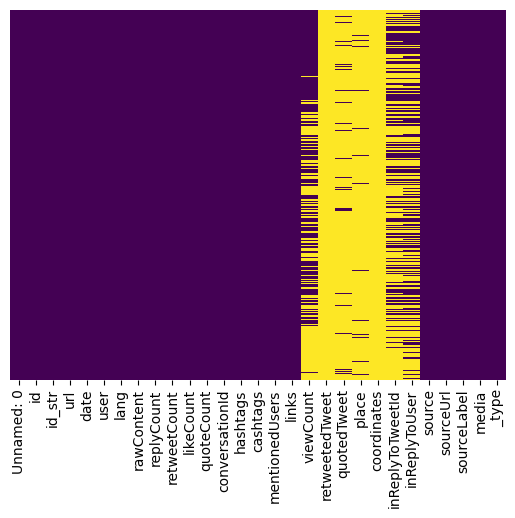

In [358]:
sn.heatmap(trafico_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [359]:
missing_values = trafico_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

retweetedTweet      12630
coordinates         12629
place               12226
quotedTweet         11705
inReplyToTweetId     8090
inReplyToUser        7220
viewCount            5394
dtype: int64

In [360]:
trafico_df = trafico_df.drop(columns=['id', 'id_str'])

In [361]:
unique_values = trafico_df[['lang']].nunique()
print("Numero de idiomas unicos:", unique_values)
unique_niveles = trafico_df['lang'].unique()
value_frequencies = trafico_df['lang'].value_counts()
print("Idiomas unicos y sus frecuencias:\n", value_frequencies)

Numero de idiomas unicos: lang    21
dtype: int64
Idiomas unicos y sus frecuencias:
 lang
es     11946
en       600
zxx       24
fr         9
qme        8
it         6
pt         6
ca         5
in         4
lt         4
qht        3
ja         3
ar         2
art        2
ko         2
eu         2
ru         1
et         1
de         1
tr         1
th         1
Name: count, dtype: int64


In [362]:
unique_values = trafico_df['place'].nunique()
print("Numero de lugares unicos:", unique_values)
unique_niveles = trafico_df['place'].unique()
value_frequencies = trafico_df['place'].value_counts()
print("Lugares unicos y sus frecuencias:\n", value_frequencies)

Numero de lugares unicos: 13
Lugares unicos y sus frecuencias:
 place
{'id': '13d479b108707983', 'fullName': 'Guatemala', 'name': 'Guatemala', 'type': 'country', 'country': 'Guatemala', 'countryCode': 'GT'}                        386
{'id': '7c01d867b8e8c494', 'fullName': 'Garland, TX', 'name': 'Garland', 'type': 'city', 'country': 'United States', 'countryCode': 'US'}                         3
{'id': '7068dd9474ab6973', 'fullName': 'Toledo, OH', 'name': 'Toledo', 'type': 'city', 'country': 'United States', 'countryCode': 'US'}                           3
{'id': '0165d65c46e85631', 'fullName': 'Howell, NJ', 'name': 'Howell', 'type': 'city', 'country': 'United States', 'countryCode': 'US'}                           2
{'id': '071a52d3a927a1b8', 'fullName': 'Valencia, Spain', 'name': 'Valencia', 'type': 'city', 'country': 'Spain', 'countryCode': 'ES'}                            2
{'id': '3b77caf94bfc81fe', 'fullName': 'Los Angeles, CA', 'name': 'Los Angeles', 'type': 'city', 'country': 'U

In [363]:
unique_values = trafico_df['sourceLabel'].nunique()
print("Numero de sources unicos:", unique_values)
unique_niveles = trafico_df['sourceLabel'].unique()
value_frequencies = trafico_df['sourceLabel'].value_counts()
print("Sources unicos y sus frecuencias:\n", value_frequencies)

Numero de sources unicos: 42
Sources unicos y sus frecuencias:
 sourceLabel
Twitter for Android               5737
Twitter for iPhone                2743
Twitter Web App                   1772
TweetDeck                         1292
advertiser-interface               358
TweetDeck Web App                  243
Twitter for Advertisers            237
simpleads-ui                        37
Twitter for iPad                    30
Twitter Media Studio                24
Hootsuite Inc.                      14
Sprinklr Publishing                 12
Оwly                                12
Twitter Web Client                  11
Buffer                              10
Periscope                            9
OneSight                             8
Tweet Hunter Pro                     8
SocialFlow                           7
Twitter Ads                          7
erased972529_fzyRVGtcON              7
Instagram                            6
erased5434447                        6
lahoragt1644885914282258435

Candidatos a presidencia

Bernardo Arévalo

In [364]:
bernardo_df.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1702109621899407575,1702109621899407575,https://twitter.com/eltuitdehoy_/status/170210...,2023-09-13 23:58:52+00:00,"{'id': 46561608, 'id_str': '46561608', 'url': ...",es,@AnonGTReloaded @msemillagt @BArevalodeLeon ja...,0,0,...,NaN,NaN,NaN,1.702089e+18,"{'id': 1419402501212811265, 'username': 'AnonG...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1702109505947865192,1702109505947865192,https://twitter.com/totitafuentes/status/17021...,2023-09-13 23:58:24+00:00,"{'id': 1005627722, 'id_str': '1005627722', 'ur...",es,@ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...,0,1,...,NaN,NaN,NaN,1.702056e+18,"{'id': 291888009, 'username': 'ASIERVERA', 'di...","<a href=""http://twitter.com/#!/download/ipad"" ...",http://twitter.com/#!/download/ipad,Twitter for iPad,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",2,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3,1702109134387134664,1702109134387134664,https://twitter.com/Fernand0483/status/1702109...,2023-09-13 23:56:55+00:00,"{'id': 1512621569834688513, 'id_str': '1512621...",es,@VicZacariasGT @soy_502 @BArevalodeLeon @msemi...,0,0,...,NaN,NaN,NaN,1.701799e+18,"{'id': 84055675, 'username': 'VicZacariasGT', ...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1702108943495926143,1702108943495926143,https://twitter.com/MaxTiger502/status/1702108...,2023-09-13 23:56:10+00:00,"{'id': 891058586, 'id_str': '891058586', 'url'...",es,@Igor_Bitkov No le sigan el juego a este ruso ...,1,0,...,NaN,NaN,NaN,1.701898e+18,"{'id': 707086237753090048, 'username': 'Igor_B...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet


In [365]:
bernardo_df[['rawContent']].head()

,rawContent
0,@AnonGTReloaded @msemillagt @BArevalodeLeon ja...
1,@ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...
2,"Paciente de 39 años, dolor lumbar de 1 año tra..."
3,@VicZacariasGT @soy_502 @BArevalodeLeon @msemi...
4,@Igor_Bitkov No le sigan el juego a este ruso ...


In [366]:
bernardo_df.describe()

,Unnamed: 0,id,id_str,replyCount,retweetCount,likeCount,quoteCount,conversationId,viewCount,coordinates,inReplyToTweetId
count,4212.000000,4.212000e+03,4.212000e+03,4212.000000,4212.000000,4212.000000,4212.000000,4.212000e+03,4.135000e+03,0.0,2.303000e+03
mean,2105.500000,1.688657e+18,1.688657e+18,28.675214,53.502137,256.966999,5.504036,1.688584e+18,4.613934e+05,NaN,1.700688e+18
std,1216.043996,2.757520e+16,2.757520e+16,283.795014,451.659694,2267.565805,59.581424,2.754962e+16,5.410313e+06,NaN,8.795416e+15
min,0.000000,1.399690e+18,1.399690e+18,0.000000,0.000000,0.000000,0.000000,1.399690e+18,1.000000e+00,NaN,1.600983e+18
25%,1052.750000,1.695128e+18,1.695128e+18,0.000000,0.000000,0.000000,0.000000,1.695031e+18,1.600000e+01,NaN,1.701752e+18
50%,2105.500000,1.701776e+18,1.701776e+18,0.000000,0.000000,1.000000,0.000000,1.701753e+18,1.080000e+02,NaN,1.701759e+18
75%,3158.250000,1.701997e+18,1.701997e+18,1.000000,1.000000,6.000000,0.000000,1.701816e+18,1.962500e+03,NaN,1.701958e+18
max,4211.000000,1.702343e+18,1.702343e+18,8609.000000,13093.000000,60609.000000,1723.000000,1.702343e+18,1.513195e+08,NaN,1.702106e+18


In [367]:
bernardo_df.shape

(4212, 29)

<Axes: >

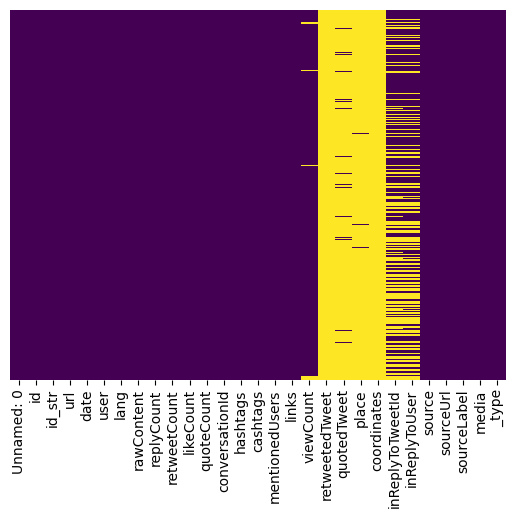

In [368]:
sn.heatmap(bernardo_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [369]:
missing_values = bernardo_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

coordinates         4212
retweetedTweet      4211
place               4151
quotedTweet         4030
inReplyToTweetId    1909
inReplyToUser       1789
viewCount             77
dtype: int64

In [370]:
bernardo_df = bernardo_df.drop(columns=['id', 'id_str'])

In [371]:
unique_values = bernardo_df[['lang']].nunique()
print("Numero de idiomas unicos:", unique_values)
unique_niveles = bernardo_df['lang'].unique()
value_frequencies = bernardo_df['lang'].value_counts()
print("Idiomas unicos y sus frecuencias:\n", value_frequencies)

Numero de idiomas unicos: lang    6
dtype: int64
Idiomas unicos y sus frecuencias:
 lang
es    3938
en     266
in       3
ar       2
zh       2
ja       1
Name: count, dtype: int64


In [372]:
unique_values = bernardo_df['place'].nunique()
print("Numero de lugares unicos:", unique_values)
unique_niveles = bernardo_df['place'].unique()
value_frequencies = bernardo_df['place'].value_counts()
print("Lugares unicos y sus frecuencias:\n", value_frequencies)

Numero de lugares unicos: 6
Lugares unicos y sus frecuencias:
 place
{'id': '13d479b108707983', 'fullName': 'Guatemala', 'name': 'Guatemala', 'type': 'country', 'country': 'Guatemala', 'countryCode': 'GT'}                                                        49
{'id': '071a52d3a927a1b8', 'fullName': 'Valencia, Spain', 'name': 'Valencia', 'type': 'city', 'country': 'Spain', 'countryCode': 'ES'}                                                           4
{'id': '0701e94ee168b555', 'fullName': 'Strasbourg, France', 'name': 'Strasbourg', 'type': 'city', 'country': 'France', 'countryCode': 'FR'}                                                     2
{'id': 'd0f5be1262dee9aa', 'fullName': 'Uruguay', 'name': 'Uruguay', 'type': 'country', 'country': 'Uruguay', 'countryCode': 'UY'}                                                               2
{'id': '018f1cde6bad9747', 'fullName': 'Ciudad Autónoma de Buenos Aires, Argentina', 'name': 'Ciudad Autónoma de Buenos Aires', 'type': 'city', 'countr

In [373]:
unique_values = bernardo_df['sourceLabel'].nunique()
print("Numero de sources unicos:", unique_values)
unique_niveles = bernardo_df['sourceLabel'].unique()
value_frequencies = bernardo_df['sourceLabel'].value_counts()
print("Sources unicos y sus frecuencias:\n", value_frequencies)

Numero de sources unicos: 21
Sources unicos y sus frecuencias:
 sourceLabel
Twitter for Android               1904
Twitter for iPhone                 880
Twitter Web App                    563
TweetDeck Web App                  320
advertiser-interface               202
TweetDeck                          135
Twitter for Advertisers            132
simpleads-ui                        16
Twitter for iPad                    15
Emplifi                              7
hivemedia-ads-crud                   7
Hootsuite Inc.                       6
SocialFlow                           5
Tweet Hunter Pro                     4
Twitter Media Studio                 3
Buffer                               3
prensa_libre164596692643321037       2
OneUp App                            2
Twitter Ads                          2
Sprinklr Publishing                  2
OneSight                             2
Name: count, dtype: int64


Sandra Torres

In [374]:
sandra_df.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1701686249797345422,1701686249797345422,https://twitter.com/Yeya16155804/status/170168...,2023-09-12 19:56:32+00:00,"{'id': 1213902343311245313, 'id_str': '1213902...",es,@bernardosilvagt @BArevalodeLeon @DrGiammattei...,0,0,...,NaN,NaN,NaN,1.701683e+18,"{'id': 3337026291, 'username': 'bernardosilvag...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1701686065361215632,1701686065361215632,https://twitter.com/Palomin17772524/status/170...,2023-09-12 19:55:48+00:00,"{'id': 1420560045323038720, 'id_str': '1420560...",es,@_awskl @mjcabrerar @BArevalodeLeon @TSEGuatem...,0,0,...,NaN,NaN,NaN,1.701685e+18,"{'id': 390988524, 'username': '_awskl', 'displ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2,1701176209076609121,1701176209076609121,https://twitter.com/iRizhao/status/17011762090...,2023-09-11 10:09:49+00:00,"{'id': 1533663614770421761, 'id_str': '1533663...",en,The 2023 National Race Walking Championship &a...,5,34,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3,1701684889081307215,1701684889081307215,https://twitter.com/_awskl/status/170168488908...,2023-09-12 19:51:07+00:00,"{'id': 390988524, 'id_str': '390988524', 'url'...",es,@Palomin17772524 @mjcabrerar @BArevalodeLeon @...,1,0,...,NaN,NaN,NaN,1.701684e+18,"{'id': 1420560045323038720, 'username': 'Palom...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
4,4,1701684719815970972,1701684719815970972,https://twitter.com/Mr_andrew89/status/1701684...,2023-09-12 19:50:27+00:00,"{'id': 454924874, 'id_str': '454924874', 'url'...",es,@ASolaresM @Mike051270 @BArevalodeLeon Otro es...,0,0,...,NaN,NaN,NaN,1.701329e+18,"{'id': 310913844, 'username': 'ASolaresM', 'di...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet


In [375]:
sandra_df[['rawContent']].head()

,rawContent
0,@bernardosilvagt @BArevalodeLeon @DrGiammattei...
1,@_awskl @mjcabrerar @BArevalodeLeon @TSEGuatem...
2,The 2023 National Race Walking Championship &a...
3,@Palomin17772524 @mjcabrerar @BArevalodeLeon @...
4,@ASolaresM @Mike051270 @BArevalodeLeon Otro es...


In [376]:
sandra_df.describe()

,Unnamed: 0,id,id_str,replyCount,retweetCount,likeCount,quoteCount,conversationId,viewCount,coordinates,inReplyToTweetId
count,5784.00000,5.784000e+03,5.784000e+03,5784.000000,5784.000000,5784.000000,5784.000000,5.784000e+03,4.962000e+03,0.0,2.950000e+03
mean,2891.50000,1.674210e+18,1.674210e+18,19.563797,38.411307,185.464039,5.127766,1.674125e+18,3.034927e+05,NaN,1.697105e+18
std,1669.84131,5.087331e+16,5.087331e+16,203.854820,341.966503,1910.616422,50.769378,5.084208e+16,4.084333e+06,NaN,2.287835e+16
min,0.00000,1.412381e+18,1.412381e+18,0.000000,0.000000,0.000000,0.000000,1.412381e+18,1.000000e+00,NaN,1.500823e+18
25%,1445.75000,1.677316e+18,1.677316e+18,0.000000,0.000000,0.000000,0.000000,1.677301e+18,1.600000e+01,NaN,1.701305e+18
50%,2891.50000,1.701370e+18,1.701370e+18,0.000000,0.000000,1.000000,0.000000,1.701328e+18,8.850000e+01,NaN,1.701637e+18
75%,4337.25000,1.701763e+18,1.701763e+18,1.000000,1.000000,7.000000,0.000000,1.701752e+18,1.360250e+03,NaN,1.701757e+18
max,5783.00000,1.702375e+18,1.702375e+18,8610.000000,13099.000000,84045.000000,1723.000000,1.702375e+18,1.513574e+08,NaN,1.702102e+18


In [377]:
sandra_df.shape

(5784, 29)

<Axes: >

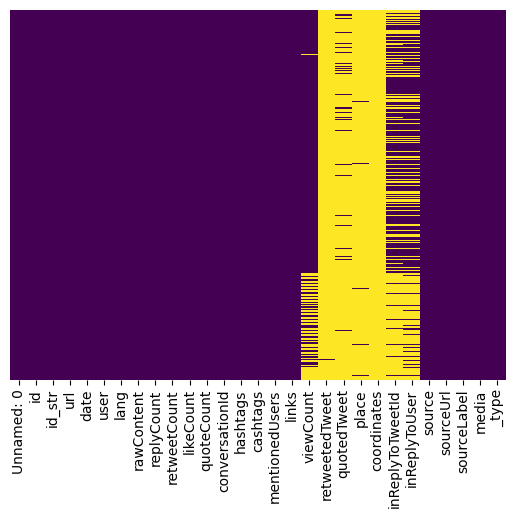

In [378]:
sn.heatmap(sandra_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [379]:
missing_values = sandra_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

coordinates         5784
retweetedTweet      5783
place               5687
quotedTweet         5422
inReplyToTweetId    2834
inReplyToUser       2603
viewCount            822
dtype: int64

In [380]:
sandra_df = sandra_df.drop(columns=['id', 'id_str'])

In [381]:
unique_values = sandra_df[['lang']].nunique()
print("Numero de idiomas unicos:", unique_values)
unique_niveles = sandra_df['lang'].unique()
value_frequencies = sandra_df['lang'].value_counts()
print("Idiomas unicos y sus frecuencias:\n", value_frequencies)

Numero de idiomas unicos: lang    13
dtype: int64
Idiomas unicos y sus frecuencias:
 lang
es     5460
en      293
pt       14
zxx       4
in        3
fr        2
qme       2
zh        1
lt        1
it        1
ja        1
ar        1
ko        1
Name: count, dtype: int64


In [382]:
unique_values = sandra_df['place'].nunique()
print("Numero de lugares unicos:", unique_values)
unique_niveles = sandra_df['place'].unique()
value_frequencies = sandra_df['place'].value_counts()
print("Lugares unicos y sus frecuencias:\n", value_frequencies)

Numero de lugares unicos: 11
Lugares unicos y sus frecuencias:
 place
{'id': '13d479b108707983', 'fullName': 'Guatemala', 'name': 'Guatemala', 'type': 'country', 'country': 'Guatemala', 'countryCode': 'GT'}                                                        83
{'id': '071a52d3a927a1b8', 'fullName': 'Valencia, Spain', 'name': 'Valencia', 'type': 'city', 'country': 'Spain', 'countryCode': 'ES'}                                                           3
{'id': 'd0f5be1262dee9aa', 'fullName': 'Uruguay', 'name': 'Uruguay', 'type': 'country', 'country': 'Uruguay', 'countryCode': 'UY'}                                                               2
{'id': '0165d65c46e85631', 'fullName': 'Howell, NJ', 'name': 'Howell', 'type': 'city', 'country': 'United States', 'countryCode': 'US'}                                                          2
{'id': 'cb36402c5f295e50', 'fullName': "Sant'Anatolia di Narco, Umbria", 'name': "Sant'Anatolia di Narco", 'type': 'city', 'country': 'Italy', 'countr

In [383]:
unique_values = sandra_df['sourceLabel'].nunique()
print("Numero de sources unicos:", unique_values)
unique_niveles = sandra_df['sourceLabel'].unique()
value_frequencies = sandra_df['sourceLabel'].value_counts()
print("Sources unicos y sus frecuencias:\n", value_frequencies)

Numero de sources unicos: 26
Sources unicos y sus frecuencias:
 sourceLabel
Twitter for Android               2787
Twitter for iPhone                1217
Twitter Web App                    762
TweetDeck                          367
TweetDeck Web App                  261
advertiser-interface               183
Twitter for Advertisers            116
simpleads-ui                        19
Twitter for iPad                    16
OneSight                             6
hivemedia-ads-crud                   6
Emplifi                              5
lahoragt1644885914282258435          5
Sprinklr Publishing                  5
Buffer                               4
Twitter Media Studio                 4
Hootsuite Inc.                       4
Twitter Ads                          3
SocialFlow                           3
Twitter for Mac                      3
Brandwatch                           3
República App                        1
OneUp App                            1
prensa_libre164596692643321

## Limpieza y Procesamiento

Trafico en Guatemala

Convertir el texto a minúsculas

In [384]:
trafico_df['processed_content'] = trafico_df['rawContent'].str.lower()
trafico_df[['processed_content']].head()

,processed_content
0,"#ahora amílcar montejo, director de comunicaci..."
1,conductora que se negó a movilizar vehículo es...
2,camión de arena volteado en el viaducto el pul...
3,"paciente de 39 años, dolor lumbar de 1 año tra..."
4,"#ahora amílcar montejo, director de comunicaci..."


In [385]:
trafico_df['processed_content'] = trafico_df['rawContent'].str.lower()
trafico_df[['processed_content']].head()

,processed_content
0,"#ahora amílcar montejo, director de comunicaci..."
1,conductora que se negó a movilizar vehículo es...
2,camión de arena volteado en el viaducto el pul...
3,"paciente de 39 años, dolor lumbar de 1 año tra..."
4,"#ahora amílcar montejo, director de comunicaci..."


Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes.

In [386]:
trafico_df['processed_content'] = trafico_df['processed_content'].apply(lambda x: re.sub(r'[@#\'\",.]', '', x))
trafico_df['processed_content'].head()

0    ahora amílcar montejo director de comunicación...
1    conductora que se negó a movilizar vehículo es...
2    camión de arena volteado en el viaducto el pul...
3    paciente de 39 años dolor lumbar de 1 año tras...
4    ahora amílcar montejo director de comunicación...
Name: processed_content, dtype: object

Quitar las url

In [387]:
trafico_df['processed_content'] = trafico_df['processed_content'].apply(lambda x: re.sub(r'http\S+', '', x))
trafico_df['processed_content'].head()

0    ahora amílcar montejo director de comunicación...
1    conductora que se negó a movilizar vehículo es...
2    camión de arena volteado en el viaducto el pul...
3    paciente de 39 años dolor lumbar de 1 año tras...
4    ahora amílcar montejo director de comunicación...
Name: processed_content, dtype: object

Revisar si hay emoticones y quitarlos.

In [388]:
emoticones = r'[:;=8][\-^*]?[)\]DP3]'
trafico_df['processed_content'] = trafico_df['processed_content'].apply(lambda x: re.sub(emoticones, '', x))
trafico_df['processed_content'].head()

0    ahora amílcar montejo director de comunicación...
1    conductora que se negó a movilizar vehículo es...
2    camión de arena volteado en el viaducto el pul...
3    paciente de 39 años dolor lumbar de 1 año tras...
4    ahora amílcar montejo director de comunicación...
Name: processed_content, dtype: object

In [389]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbat symbols
                           "]+", flags=re.UNICODE)

trafico_df['processed_content'] = trafico_df['processed_content'].apply(lambda x: emoji_pattern.sub(r'', x))
trafico_df['processed_content'].head()


0    ahora amílcar montejo director de comunicación...
1    conductora que se negó a movilizar vehículo es...
2    camión de arena volteado en el viaducto el pul...
3    paciente de 39 años dolor lumbar de 1 año tras...
4    ahora amílcar montejo director de comunicación...
Name: processed_content, dtype: object

Quitar los signos de puntuación.

In [390]:
punctuation_regex = r'[!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'
trafico_df['processed_content'] = trafico_df['processed_content'].apply(lambda x: re.sub(punctuation_regex, '', x))
trafico_df['processed_content'].head()

0    ahora amílcar montejo director de comunicación...
1    conductora que se negó a movilizar vehículo es...
2    camión de arena volteado en el viaducto el pul...
3    paciente de 39 años dolor lumbar de 1 año tras...
4    ahora amílcar montejo director de comunicación...
Name: processed_content, dtype: object

Quitar los artículos, preposiciones y conjunciones (stopwords)

In [391]:
nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')
trafico_df['processed_content'] = trafico_df['processed_content'].apply(lambda x: ' '.join([word for word in x.split() if word not in spanish_stopwords]))
trafico_df['processed_content'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yeyoc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    ahora amílcar montejo director comunicación em...
1    conductora negó movilizar vehículo multada cal...
2    camión arena volteado viaducto pulté hacia hac...
3    paciente 39 años dolor lumbar 1 año tras caída...
4    ahora amílcar montejo director comunicación em...
Name: processed_content, dtype: object

Candidatos a presidencia

Bernardo Arévalo

Convertir el texto a minúsculas

In [392]:
bernardo_df['processed_content'] = bernardo_df['rawContent'].str.lower()
bernardo_df[['processed_content']].head()

,processed_content
0,@anongtreloaded @msemillagt @barevalodeleon ja...
1,@asiervera @aztecanoticiagt @barevalodeleon do...
2,"paciente de 39 años, dolor lumbar de 1 año tra..."
3,@viczacariasgt @soy_502 @barevalodeleon @msemi...
4,@igor_bitkov no le sigan el juego a este ruso ...


In [393]:
bernardo_df['processed_content'] = bernardo_df['rawContent'].str.lower()
bernardo_df[['processed_content']].head()

,processed_content
0,@anongtreloaded @msemillagt @barevalodeleon ja...
1,@asiervera @aztecanoticiagt @barevalodeleon do...
2,"paciente de 39 años, dolor lumbar de 1 año tra..."
3,@viczacariasgt @soy_502 @barevalodeleon @msemi...
4,@igor_bitkov no le sigan el juego a este ruso ...


Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes.

In [394]:
bernardo_df['processed_content'] = bernardo_df['processed_content'].apply(lambda x: re.sub(r'[@#\'\",.]', '', x))
bernardo_df['processed_content'].head()

0    anongtreloaded msemillagt barevalodeleon jajaj...
1    asiervera aztecanoticiagt barevalodeleon dos v...
2    paciente de 39 años dolor lumbar de 1 año tras...
3    viczacariasgt soy_502 barevalodeleon msemillag...
4    igor_bitkov no le sigan el juego a este ruso i...
Name: processed_content, dtype: object

Quitar las url

In [395]:
bernardo_df['processed_content'] = bernardo_df['processed_content'].apply(lambda x: re.sub(r'http\S+', '', x))
bernardo_df['processed_content'].head()

0    anongtreloaded msemillagt barevalodeleon jajaj...
1    asiervera aztecanoticiagt barevalodeleon dos v...
2    paciente de 39 años dolor lumbar de 1 año tras...
3    viczacariasgt soy_502 barevalodeleon msemillag...
4    igor_bitkov no le sigan el juego a este ruso i...
Name: processed_content, dtype: object

Revisar si hay emoticones y quitarlos.

In [396]:
emoticones = r'[:;=8][\-^*]?[)\]DP3]'
bernardo_df['processed_content'] = bernardo_df['processed_content'].apply(lambda x: re.sub(emoticones, '', x))
bernardo_df['processed_content'].head()

0    anongtreloaded msemillagt barevalodeleon jajaj...
1    asiervera aztecanoticiagt barevalodeleon dos v...
2    paciente de 39 años dolor lumbar de 1 año tras...
3    viczacariasgt soy_502 barevalodeleon msemillag...
4    igor_bitkov no le sigan el juego a este ruso i...
Name: processed_content, dtype: object

In [397]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbat symbols
                           "]+", flags=re.UNICODE)

bernardo_df['processed_content'] = bernardo_df['processed_content'].apply(lambda x: emoji_pattern.sub(r'', x))
bernardo_df['processed_content'].head()


0    anongtreloaded msemillagt barevalodeleon jajaj...
1    asiervera aztecanoticiagt barevalodeleon dos v...
2    paciente de 39 años dolor lumbar de 1 año tras...
3    viczacariasgt soy_502 barevalodeleon msemillag...
4    igor_bitkov no le sigan el juego a este ruso i...
Name: processed_content, dtype: object

Quitar los signos de puntuación.

In [398]:
punctuation_regex = r'[!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'
bernardo_df['processed_content'] = bernardo_df['processed_content'].apply(lambda x: re.sub(punctuation_regex, '', x))
bernardo_df['processed_content'].head()

0    anongtreloaded msemillagt barevalodeleon jajaj...
1    asiervera aztecanoticiagt barevalodeleon dos v...
2    paciente de 39 años dolor lumbar de 1 año tras...
3    viczacariasgt soy_502 barevalodeleon msemillag...
4    igor_bitkov no le sigan el juego a este ruso i...
Name: processed_content, dtype: object

Quitar los artículos, preposiciones y conjunciones (stopwords)

In [399]:
nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')
bernardo_df['processed_content'] = bernardo_df['processed_content'].apply(lambda x: ' '.join([word for word in x.split() if word not in spanish_stopwords]))
bernardo_df['processed_content'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yeyoc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    anongtreloaded msemillagt barevalodeleon jajaj...
1    asiervera aztecanoticiagt barevalodeleon dos v...
2    paciente 39 años dolor lumbar 1 año tras caída...
3    viczacariasgt soy_502 barevalodeleon msemillag...
4    igor_bitkov sigan juego ruso invasor enero sol...
Name: processed_content, dtype: object

Sandra Torres

Convertir el texto a minúsculas

In [400]:
sandra_df['processed_content'] = sandra_df['rawContent'].str.lower()
sandra_df[['processed_content']].head()

,processed_content
0,@bernardosilvagt @barevalodeleon @drgiammattei...
1,@_awskl @mjcabrerar @barevalodeleon @tseguatem...
2,the 2023 national race walking championship &a...
3,@palomin17772524 @mjcabrerar @barevalodeleon @...
4,@asolaresm @mike051270 @barevalodeleon otro es...


In [401]:
sandra_df['processed_content'] = sandra_df['rawContent'].str.lower()
sandra_df[['processed_content']].head()

,processed_content
0,@bernardosilvagt @barevalodeleon @drgiammattei...
1,@_awskl @mjcabrerar @barevalodeleon @tseguatem...
2,the 2023 national race walking championship &a...
3,@palomin17772524 @mjcabrerar @barevalodeleon @...
4,@asolaresm @mike051270 @barevalodeleon otro es...


Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes.

In [402]:
sandra_df['processed_content'] = sandra_df['processed_content'].apply(lambda x: re.sub(r'[@#\'\",.]', '', x))
sandra_df['processed_content'].head()

0    bernardosilvagt barevalodeleon drgiammattei me...
1    _awskl mjcabrerar barevalodeleon tseguatemala ...
2    the 2023 national race walking championship &a...
3    palomin17772524 mjcabrerar barevalodeleon tseg...
4    asolaresm mike051270 barevalodeleon otro estup...
Name: processed_content, dtype: object

Quitar las url

In [403]:
sandra_df['processed_content'] = sandra_df['processed_content'].apply(lambda x: re.sub(r'http\S+', '', x))
sandra_df['processed_content'].head()

0    bernardosilvagt barevalodeleon drgiammattei me...
1    _awskl mjcabrerar barevalodeleon tseguatemala ...
2    the 2023 national race walking championship &a...
3    palomin17772524 mjcabrerar barevalodeleon tseg...
4    asolaresm mike051270 barevalodeleon otro estup...
Name: processed_content, dtype: object

Revisar si hay emoticones y quitarlos.

In [404]:
emoticones = r'[:;=8][\-^*]?[)\]DP3]'
sandra_df['processed_content'] = sandra_df['processed_content'].apply(lambda x: re.sub(emoticones, '', x))
sandra_df['processed_content'].head()

0    bernardosilvagt barevalodeleon drgiammattei me...
1    _awskl mjcabrerar barevalodeleon tseguatemala ...
2    the 2023 national race walking championship &a...
3    palomin17772524 mjcabrerar barevalodeleon tseg...
4    asolaresm mike051270 barevalodeleon otro estup...
Name: processed_content, dtype: object

In [405]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbat symbols
                           "]+", flags=re.UNICODE)

sandra_df['processed_content'] = sandra_df['processed_content'].apply(lambda x: emoji_pattern.sub(r'', x))
sandra_df['processed_content'].head()


0    bernardosilvagt barevalodeleon drgiammattei me...
1    _awskl mjcabrerar barevalodeleon tseguatemala ...
2    the 2023 national race walking championship &a...
3    palomin17772524 mjcabrerar barevalodeleon tseg...
4    asolaresm mike051270 barevalodeleon otro estup...
Name: processed_content, dtype: object

Quitar los signos de puntuación.

In [406]:
punctuation_regex = r'[!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'
sandra_df['processed_content'] = sandra_df['processed_content'].apply(lambda x: re.sub(punctuation_regex, '', x))
sandra_df['processed_content'].head()

0    bernardosilvagt barevalodeleon drgiammattei me...
1    _awskl mjcabrerar barevalodeleon tseguatemala ...
2    the 2023 national race walking championship &a...
3    palomin17772524 mjcabrerar barevalodeleon tseg...
4    asolaresm mike051270 barevalodeleon otro estup...
Name: processed_content, dtype: object

Quitar los artículos, preposiciones y conjunciones (stopwords)

In [407]:
nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')
sandra_df['processed_content'] = sandra_df['processed_content'].apply(lambda x: ' '.join([word for word in x.split() if word not in spanish_stopwords]))
sandra_df['processed_content'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yeyoc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    bernardosilvagt barevalodeleon drgiammattei me...
1    _awskl mjcabrerar barevalodeleon tseguatemala ...
2    the 2023 national race walking championship &a...
3    palomin17772524 mjcabrerar barevalodeleon tseg...
4    asolaresm mike051270 barevalodeleon estupido c...
Name: processed_content, dtype: object

## Análisis Exploratorio y Problemas

PROBLEMA 1.
Extraiga los datos relacionados con el tráfico en la ciudad de Guatemala, puede utilizar cualquier
red social, a la que se tenga acceso, y pueden extraerse datos de varias. Por ejemplo, si extrae datos
de twitter (ahora X) podría utilizar los hashtag #TraficoGT, #TransitoGT o @amilcarmontejo . Explore
los datos que extraiga y descubra conocimiento, tendencias y elementos interesantes. ¿Cómo ha
venido a complicar el tráfico en toda la ciudad la época de lluvia?¿El socavón de zona 5 ha tenido
un impacto importante en el tráfico de la zona de la universidad?

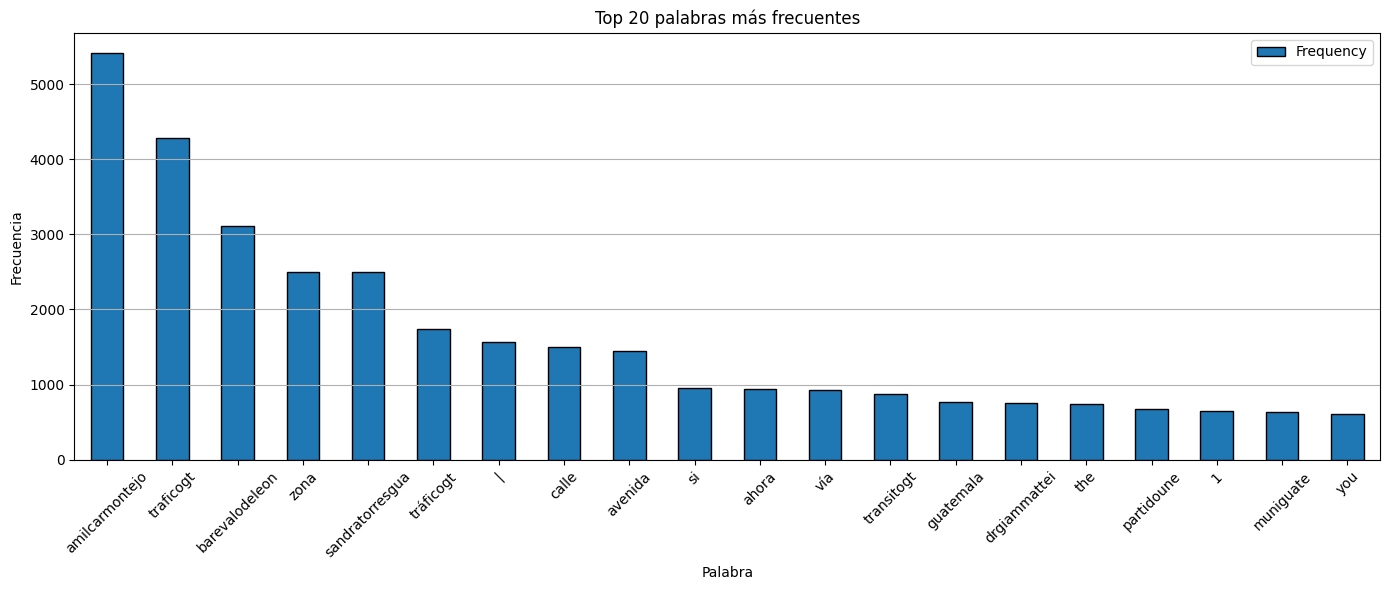

In [408]:
all_words = ' '.join(trafico_df['processed_content']).split()
word_freq = Counter(all_words)
top_words = word_freq.most_common(20)
df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

df_top_words.set_index('Word').plot(kind='bar', figsize=(14, 6), edgecolor='black')
plt.title("Top 20 palabras más frecuentes")
plt.xlabel("Palabra")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

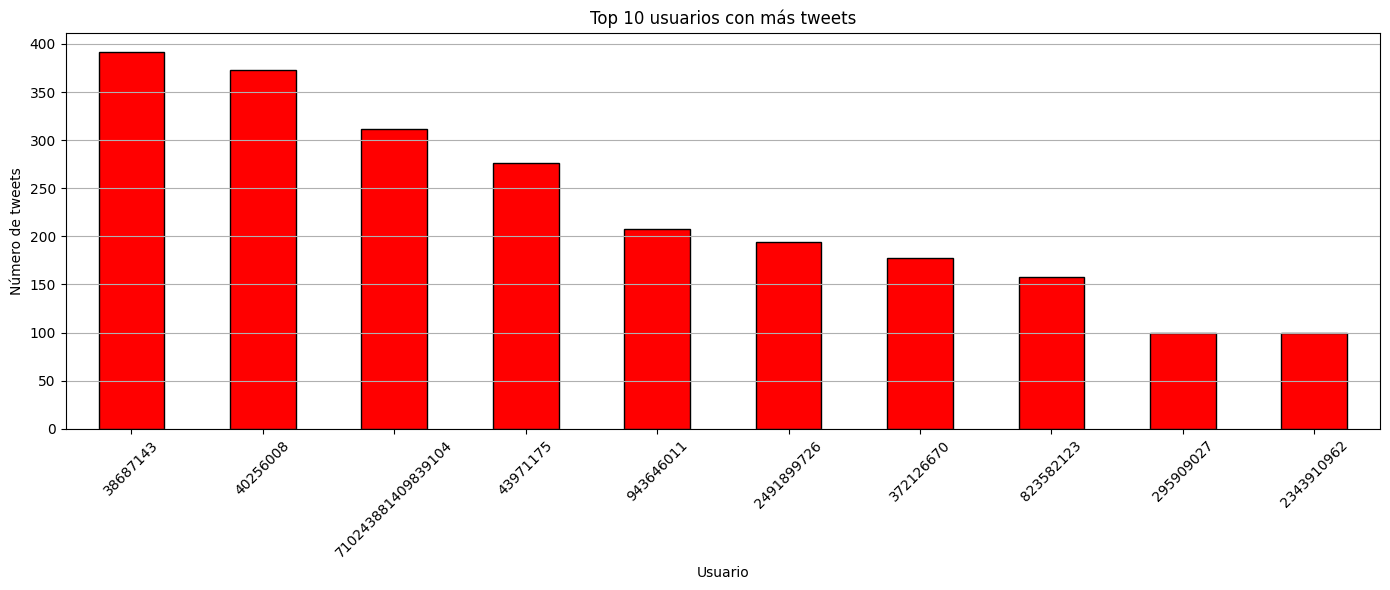

In [409]:
trafico_df['user_id'] = trafico_df['user'].apply(lambda x: x.split("'id_str': '")[1].split("',")[0])
top_users = trafico_df['user_id'].value_counts().head(10)

top_users.plot(kind='bar', figsize=(14, 6), color='red', edgecolor='black')
plt.title("Top 10 usuarios con más tweets")
plt.xlabel("Usuario")
plt.ylabel("Número de tweets")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\yeyoc\AppData\Local\Temp\ipykernel_18720\3560553067.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trafico_df['year_month'] = trafico_df['date'].dt.to_period('M')


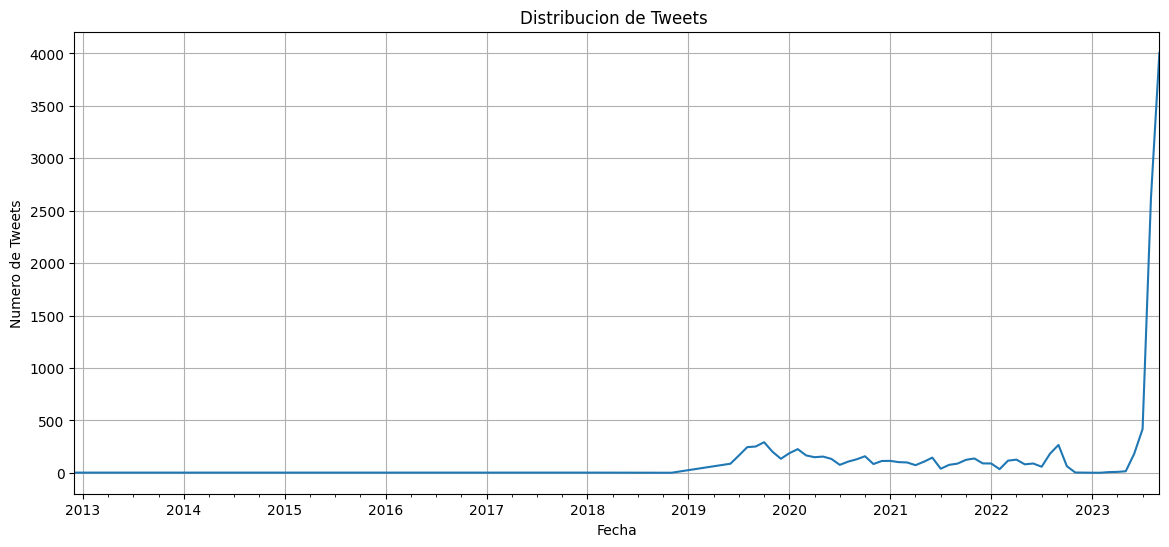

In [410]:
trafico_df['date'] = pd.to_datetime(trafico_df['date'])
trafico_df['year_month'] = trafico_df['date'].dt.to_period('M')
tweets_over_time = trafico_df.groupby('year_month').size()

tweets_over_time.plot(figsize=(14, 6), title="Distribucion de Tweets ")
plt.xlabel("Fecha")
plt.ylabel("Numero de Tweets")
plt.grid(True)
plt.show()

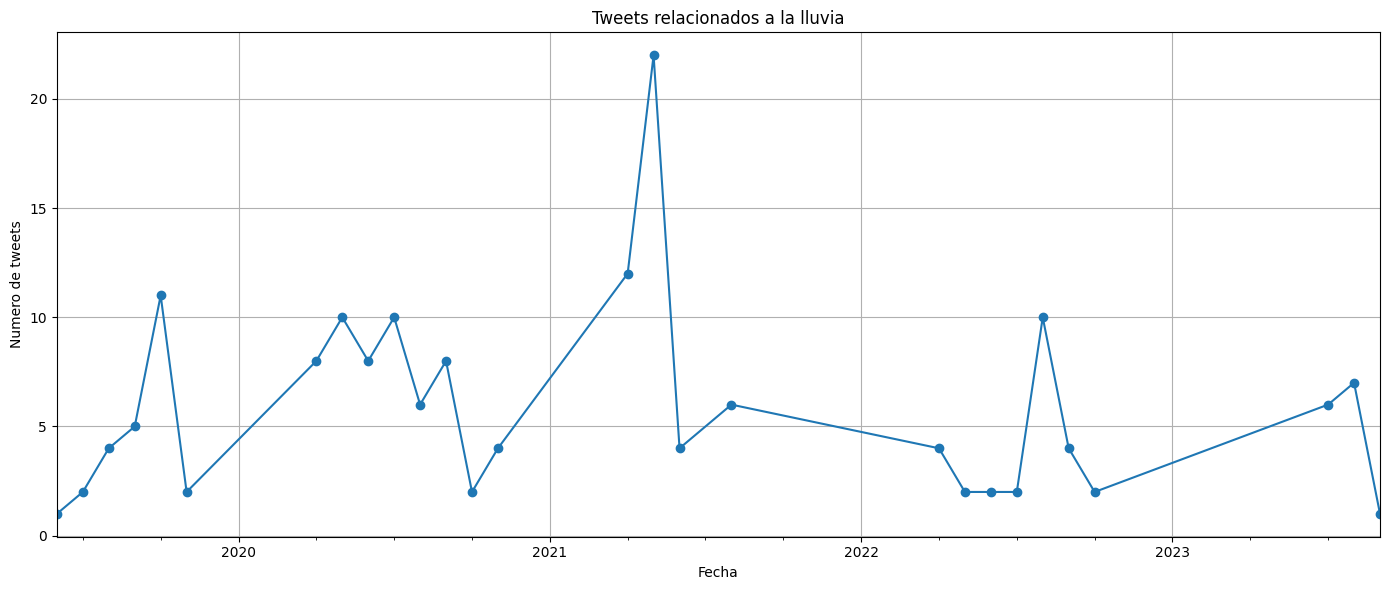

In [411]:
rain_related_terms = ['lluvia', 'aguacero', 'tormenta', 'trueno', 'paraguas', 'chubasco', 'lluvioso', 'lloviizna', 'relampago', 'nublado', 'inundación']
rain_tweets = trafico_df[trafico_df['processed_content'].str.contains('|'.join(rain_related_terms), case=False)]

rain_tweets_per_month = rain_tweets['year_month'].value_counts().sort_index()

rain_tweets_per_month.plot(figsize=(14, 6), title="Tweets relacionados a la lluvia", marker='o')
plt.xlabel("Fecha")
plt.ylabel("Numero de tweets")
plt.grid(True)
plt.tight_layout()
plt.show()

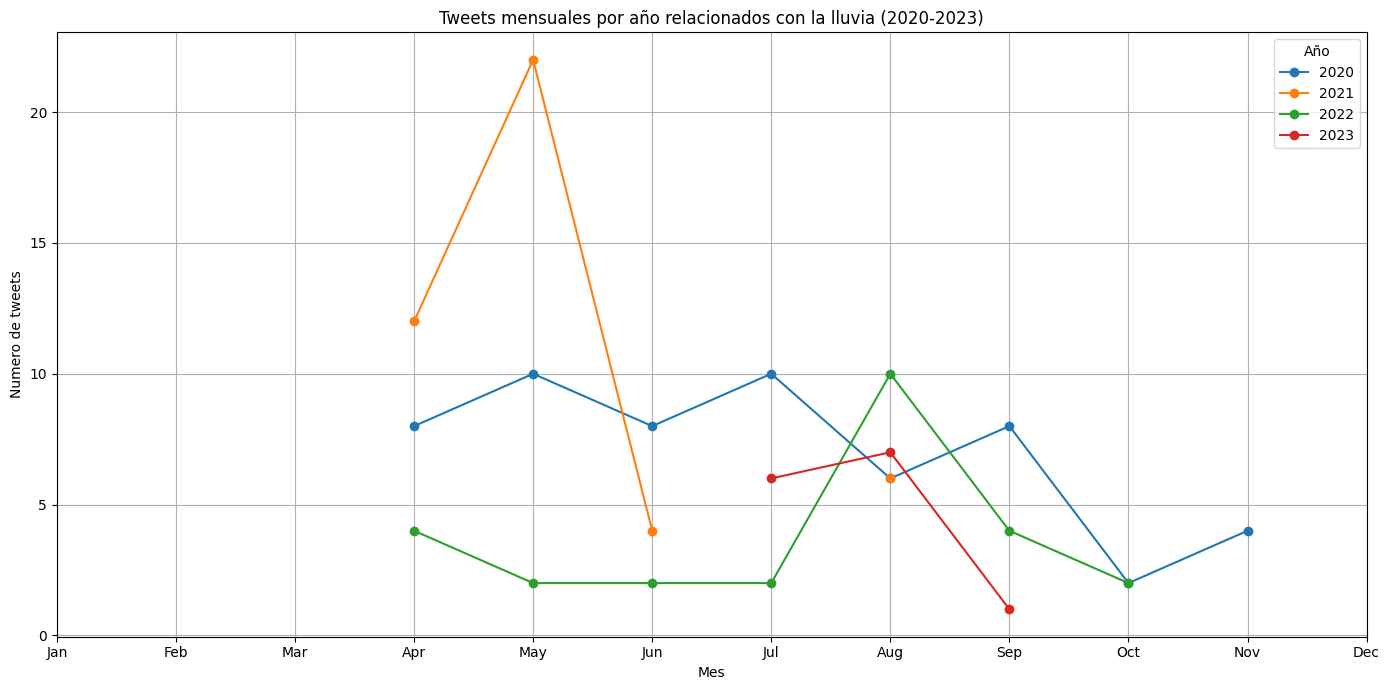

In [412]:
filtered_rain_tweets = rain_tweets[rain_tweets['date'].dt.year.isin([2020, 2021, 2022, 2023])]
monthly_rain_tweets = filtered_rain_tweets.groupby([filtered_rain_tweets['date'].dt.year, filtered_rain_tweets['date'].dt.month]).size().unstack(level=0)

monthly_rain_tweets.plot(figsize=(14, 7), marker='o', title="Tweets mensuales por año relacionados con la lluvia (2020-2023)")
plt.xlabel("Mes")
plt.ylabel("Numero de tweets")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Año")
plt.grid(True)
plt.tight_layout()
plt.show()

¿Cómo ha venido a complicar el tráfico en toda la ciudad la época de lluvia? <br><br>
Como podemos obsrvar, los tweets en relación al tráfico aumentan en las épocas de lluvia. Realmente en los meses en los que usualmente no llueve no tenemos presencia de tweets de tráfico, lo cual sugiere que la gente no suele quejarse de tráfico específico a lluvia cuando el mes no es de lluvia. Es solo cuando se vuelven muchos días de lluvia seguidos que la gente empieza a molestarse por esto.

In [413]:
socavon_tweets = trafico_df[(
    trafico_df['processed_content'].str.contains('socavón', case=False) | 
    trafico_df['processed_content'].str.contains('socavon', case=False)
) & trafico_df['processed_content'].str.contains('zona 5', case=False)]
                        
zona_15_mentions = socavon_tweets['processed_content'].str.contains('zona 15', case=False).sum()

total_socavon_tweets = len(socavon_tweets)
zona_15_mentions, total_socavon_tweets

(0, 0)

In [414]:
socavon_general_tweets = trafico_df[trafico_df['processed_content'].str.contains('socavon', case=False)]

zona_15_mentions_general = socavon_general_tweets['processed_content'].str.contains('zona 15', case=False).sum()

total_socavon_general_tweets = len(socavon_general_tweets)
zona_15_mentions_general, total_socavon_general_tweets

(0, 0)

In [415]:
hundimiento_tweets = trafico_df[trafico_df['processed_content'].str.contains('hundimiento', case=False)]
zona_5_mentions_hundimiento = hundimiento_tweets['processed_content'].str.contains('zona 5', case=False).sum()
zona_15_mentions_hundimiento = hundimiento_tweets['processed_content'].str.contains('zona 15', case=False).sum()

total_hundimiento_tweets = len(hundimiento_tweets)
zona_5_mentions_hundimiento, zona_15_mentions_hundimiento, total_hundimiento_tweets

(0, 0, 12)

¿El socavón de zona 5 ha tenido un impacto importante en el tráfico de la zona de la universidad? <br><br>
Como podemos obsrvar, dentro de nuestro dataset, no se puede afirmar una relación entre el socavón de zona 5 con el tráfico en zona 15, que es la zona de la universidad. Esto podría ser por la baja cantidad relativa al dataset que hay de tweets sobre el socavón en general o porque no tiene un gran ipacto a los ojos de las personas que usan tweeter.

PROBLEMA 2.
Extraiga los datos que le permitan determinar la popularidad de Bernardo Arévalo y de Sandra
Torres, puede utilizar cualquier red social, a la que se tenga acceso, y pueden extraerse datos de
varias. Explore los datos que extraiga y descubra conocimiento, tendencias y elementos
interesantes. ¿La opinión pública de cada uno de los candidatos es en su mayoría positiva o
negativa? Puede usar comentarios para responderse esta pregunta. ¿Encontró algún
influencer?¿Cómo describiría la estructura de la red de cada uno de los candidatos, centralizada o
distribuida?¿Fue durante su campaña la red social un aspecto importante para influir en la decisión
de los guatemaltecos?

In [416]:
spanish_stopwords = set(stopwords.words('spanish'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[@#\'"]', '', text)
    text = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', '', text)
    text = ' '.join(word for word in text.split() if word not in spanish_stopwords)
    return text

bernardo_df['processedContent'] = bernardo_df['rawContent'].apply(preprocess_text)
sandra_df['processedContent'] = sandra_df['rawContent'].apply(preprocess_text)

bernardo_processed_head = bernardo_df[['rawContent', 'processedContent']].head()
sandra_processed_head = sandra_df[['rawContent', 'processedContent']].head()

c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

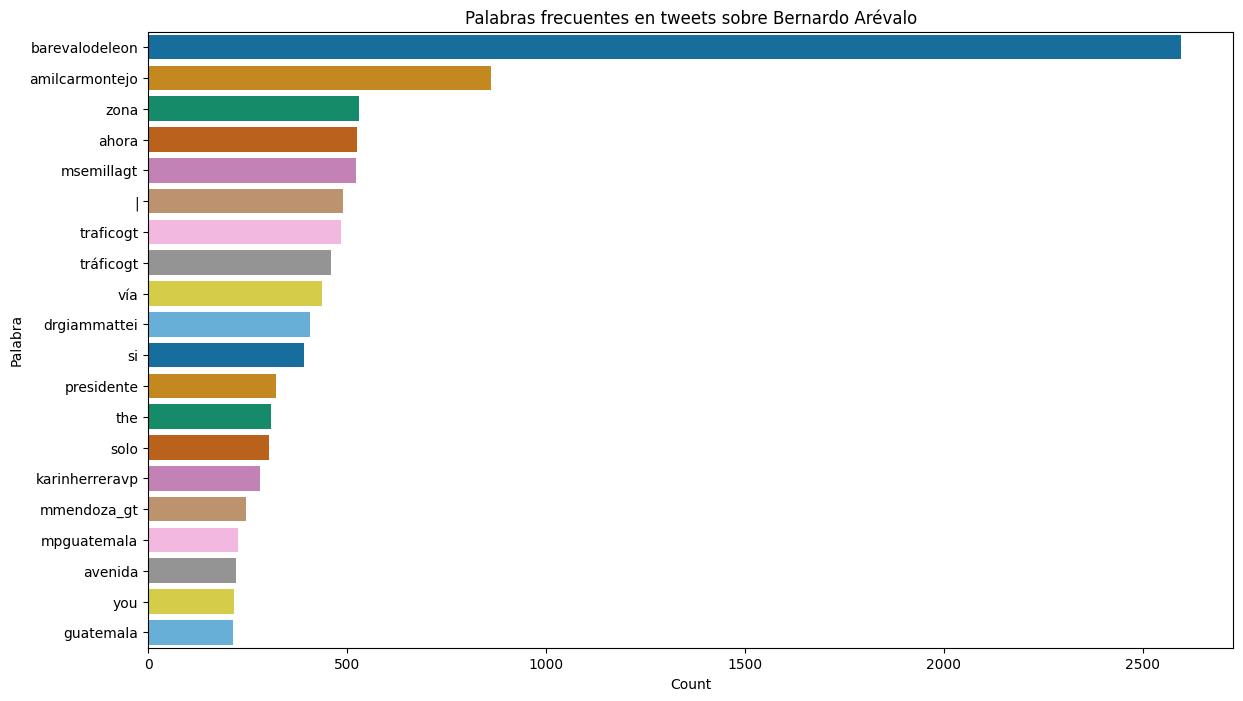

c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

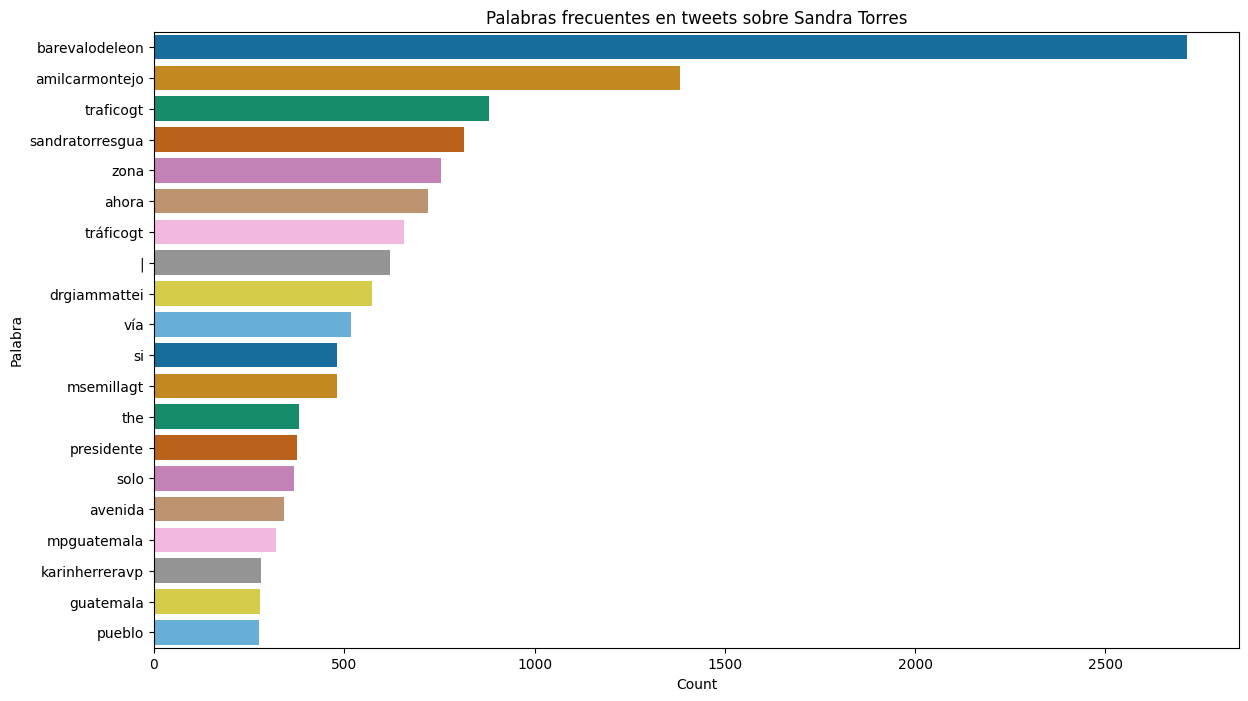

In [417]:
def plot_most_frequent_words(df, column_name, title, n=20):
    all_words = ' '.join(df[column_name]).split()
    
    word_freq = Counter(all_words)
    
    common_words = word_freq.most_common(n)
    
    words = [word[0] for word in common_words]
    counts = [word[1] for word in common_words]
    
    plt.figure(figsize=(14,8))
    sn.barplot(x=counts, y=words, palette="colorblind")
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Palabra')
    plt.show()

plot_most_frequent_words(bernardo_df, 'processedContent', 'Palabras frecuentes en tweets sobre Bernardo Arévalo')
plot_most_frequent_words(sandra_df, 'processedContent', 'Palabras frecuentes en tweets sobre Sandra Torres')

c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


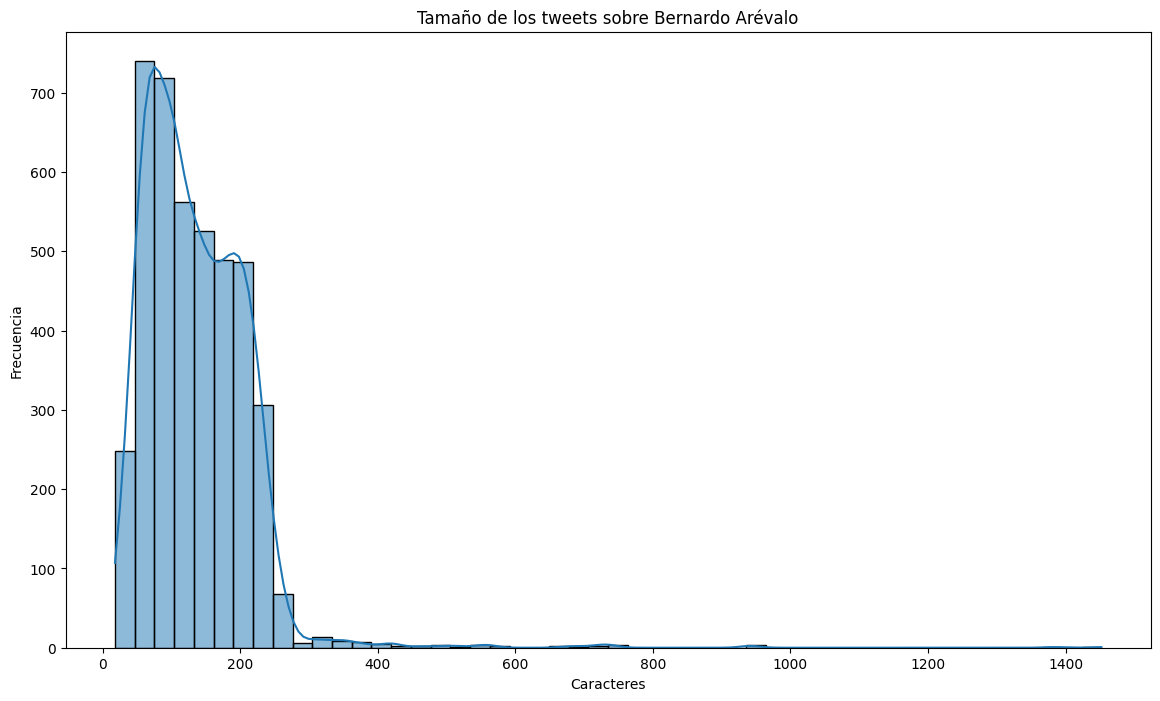

c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


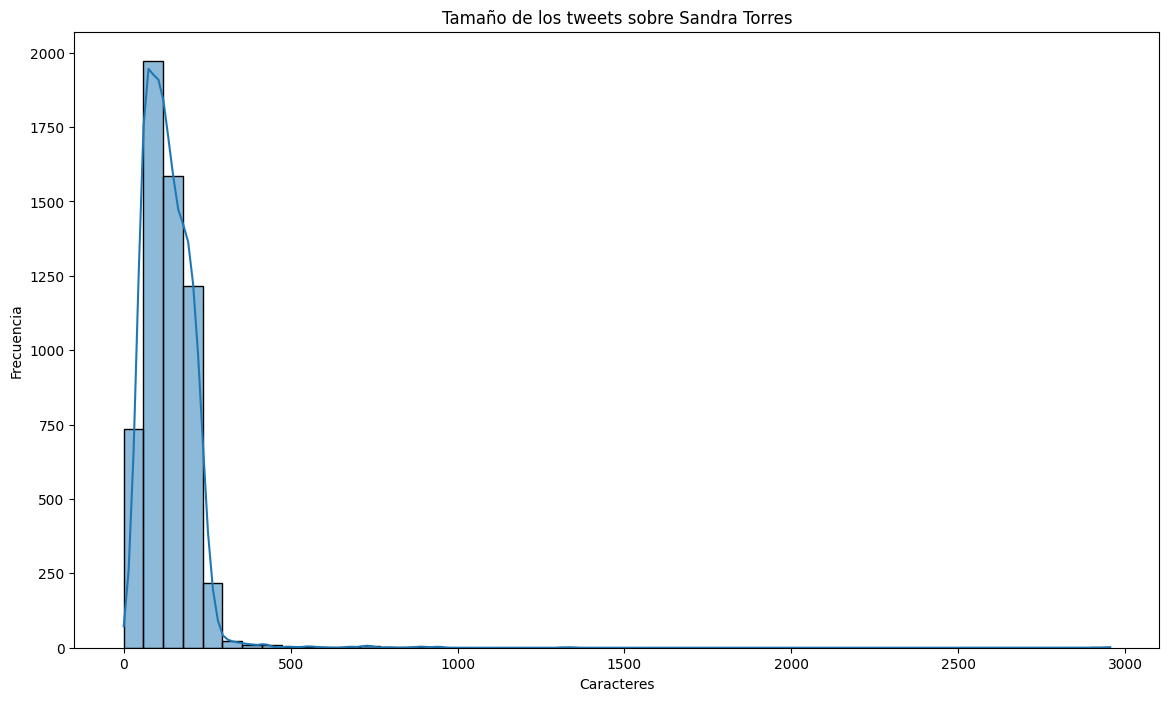

In [418]:
def plot_tweet_length_distribution(df, column_name, title):
    tweet_lengths = df[column_name].apply(len)    
    plt.figure(figsize=(14,8))
    sn.histplot(tweet_lengths, kde=True, bins=50)
    plt.title(title)
    plt.xlabel('Caracteres')
    plt.ylabel('Frecuencia')
    plt.show()

plot_tweet_length_distribution(bernardo_df, 'processedContent', 'Tamaño de los tweets sobre Bernardo Arévalo')
plot_tweet_length_distribution(sandra_df, 'processedContent', 'Tamaño de los tweets sobre Sandra Torres')

In [419]:
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

bernardo_df['sentiment'] = bernardo_df['processedContent'].apply(get_textblob_sentiment)
sandra_df['sentiment'] = sandra_df['processedContent'].apply(get_textblob_sentiment)

bernardo_sentiment_dist = bernardo_df['sentiment'].value_counts(normalize=True) * 100
sandra_sentiment_dist = sandra_df['sentiment'].value_counts(normalize=True) * 100

print("Tweets de Bernardo","\n", bernardo_sentiment_dist)


print("Tweets de Sandra", "\n",sandra_sentiment_dist)

Tweets de Bernardo 
 sentiment
neutral     89.529915
positive     8.926876
negative     1.543210
Name: proportion, dtype: float64
Tweets de Sandra 
 sentiment
neutral     91.026971
positive     7.503458
negative     1.469571
Name: proportion, dtype: float64


¿La opinión pública de cada uno de los candidatos es en su mayoría positiva o negativa? ¿Cómo describiría la estructura de la red de cada uno de los candidatos, centralizada o distribuida? <br><br>
Basándonos en los tweets del dataset y el modelo de textblob para análisis de sentimiento, podemos encontrar que la opinión pública de los candidatos es en su mayoría neutra, existiendo pocos tweets negativos o positivos. De la misma manera, la estructura de red de ambos candidatos es en su mayoría centralizada.

In [421]:
bernardo_top_retweets = bernardo_df.sort_values(by='retweetCount', ascending=False).head(5)
sandra_top_retweets = sandra_df.sort_values(by='retweetCount', ascending=False).head(5)

bernardo_influencers = bernardo_top_retweets[['user', 'retweetCount']]
sandra_influencers = sandra_top_retweets[['user', 'retweetCount']]

bernardo_influencers, sandra_influencers

(                                                   user  retweetCount
 3460  {'id': 1555154364901236736, 'id_str': '1555154...         13093
 81    {'id': 1555154364901236736, 'id_str': '1555154...         13092
 1320  {'id': 1555154364901236736, 'id_str': '1555154...         10969
 1478  {'id': 1555154364901236736, 'id_str': '1555154...         10969
 141   {'id': 1598683179505909765, 'id_str': '1598683...          6226,
                                                    user  retweetCount
 3077  {'id': 1555154364901236736, 'id_str': '1555154...         13099
 456   {'id': 1625577357883875328, 'id_str': '1625577...         11648
 3118  {'id': 1555154364901236736, 'id_str': '1555154...         10979
 2118  {'id': 1598683179505909765, 'id_str': '1598683...          6232
 2704  {'id': 1326237414025801729, 'id_str': '1326237...          4065)

¿Encontró algún influencer? <br><br>
Tweeter (ahora X) ya no permite conocer el nombre de usuario dentro del dataset por lo que es imposible saber si los tweets más populares son hechos por influencers o no. 

¿Fue durante su campaña la red social un aspecto importante para influir en la decisión de los guatemaltecos? <br><br>
La red social puede tener un gran impacto en la decisión de los guatemaltecos, especialmente porque la población se deja guíar mucho por lo que lee, sin necesariamente encontrar los hechos por su propia cuenta. Muchas veces como seres humanos nos quedamos con lo que nos dicen y en el caso de candidatos presidenciables esto, a pesar de ser un problema, resulta ser muy común.